<a href="https://colab.research.google.com/github/GabeAspir/Patent-Prior-Art-Finder/blob/main/documentation/Stage_1_Documentation_The_Official_Patent_Prior_Art_Finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Patent Prior Art Finder

### By Gabriel Aspir, Zach Fish, Ephraim Meiri<br>
### mentored by Dave Feltenberger

### Our Goal:<br>
When given a huge dataset of patents, we want to be able to compare and contrast them in meaningful ways, as well as compare them to new patents.<br>
Real World Example: Let's say somebody wants to get themselves their very own patent. They have to do research first to make sure that their idea is patentable, and not too similar to any other patents.

# Demonstration & Explanation

First, let's import our Patent-Prior-Art-Finder as an object. (Currently, only available to those with access to the github repo to download the file itself into Colab)

In [ ]:
from _DevPatentPriorArtFinder import _DevPatentPriorArtFinder as d
patentFinder = d()

Now let's see the types of things we can do with 1010 patents. These were already retrieved from Google's patent database and saved as a csv. The first 1000 patents were all randomly selected. 3 of the last 10 were deemed similar by us humans (They all talked about liquid laundry detergent), and the real test will be if the algorithm finds them similar.

The `init()` method will create a pandas dataframe with the passed csv file (or filepath rather) and will add the neccesary metadata to that dataframe. The method has 2 optional parameters that allow the user to specify the names of the column that conains the identifier of each document as well as the column that has the text we should use for the comparison.

**Tokens** contains a list of tokenized words for each document. This representation readies us for the bag of words that is to come by splitting the words, and removing the least meaningful ones (numbers, as well as words taken from nltk's stopwords list).

**BagOfWords** will convert that tokenized text into vectors that will be truly machine readable. This is acccomplished by constructing a corpus across all our documents and then representing each document's wordcount for each word in a dense ordered list. This vector representation allows us to easily perform mathematical operations for computing similarity.

**TF-IDF** or Term Frequency Inverse Document Frequency, is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. It utilizes vectors to allow a document to become machine readable. TF-IDF works by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [ ]:
#First 1000 Patents
url = 'https://drive.google.com/file/d/1GcI7CvaipcyZipPm7_y2glKpoJAfc8vF/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dataframe = patentFinder.init(dwn_url, 'Publication_Number', 'Abstract')


#Adding 10 patents to dataframe - with 3 similar ones
url2 = 'https://drive.google.com/file/d/18DdQd4ZPbcvOeZ6x2KRJHmvpGarnw9Qx/view?usp=sharing'
file_id2 = url2.split('/')[-2]
dwn_url2='https://drive.google.com/uc?id=' + file_id2

dataframe = patentFinder._add_patents_to_data(dwn_url2, 'Publication_Number', 'Abstract')
dataframe

,Publication_Number,Abstract,description,claim,Description,Claim,Tokens,BagOfWords,TF-IDF
0,US-8916903-B2,A light emitting device that includes a substr...,CROSS-REFERENCE TO RELATED APPLICATIONS \n ...,What is claimed is: \n \n 1. A light...,NaN,NaN,"[light, emitting, device, includes, substrate,...","[1, 2, 1, 4, 2, 3, 4, 1, 1, 3, 1, 5, 4, 1, 1, ...","[0.02840285156071012, 0.010432286673720405, 0...."
1,US-2019286073-A1,A method for training parameters of a first do...,RELATED APPLICATIONS \n This application i...,What is claimed is: \n \n 1 . A me...,NaN,NaN,"[method, training, parameters, first, domain, ...","[0, 2, 0, 0, 0, 0, 11, 9, 0, 0, 0, 0, 0, 0, 0,...","[0.0, 0.008504581527489459, 0.0, 0.0, 0.0, 0.0..."
2,US-2018336391-A1,An electronic device is provided and includes ...,CROSS-REFERENCE TO RELATED APPLICATION \n ...,What is claimed is: \n \n 1 . An e...,NaN,NaN,"[electronic, device, provided, includes, flexi...","[0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, ...","[0.0, 0.009659524697889261, 0.0, 0.0, 0.143722..."
3,US-2011163923-A1,An apparatus including a wireless communicatio...,CROSS-REFERENCE TO RELATED APPLICATIONS \n ...,1 . A multi-band antenna including:\n at least...,NaN,NaN,"[apparatus, including, wireless, communication...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, ...","[0.0, 0.004548962212378083, 0.0, 0.0, 0.0, 0.0..."
4,US-4125546-A,Prostaglandin analogs with the following cyclo...,The present application is a divisional applic...,I claim: \n \n 1. A prostaglandin an...,NaN,NaN,"[prostaglandin, analogs, following, cyclopenta...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...
1005,US-5536436-A,A liquid laundry detergent composition contain...,NaN,NaN,FIELD OF THE INVENTION \n The present inve...,What is claimed is: \n \n 1. A heavy...,"[liquid, laundry, detergent, composition, cont...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1006,US-2015111807-A1,A liquid laundry detergent composition compris...,NaN,NaN,FIELD OF THE INVENTION \n The present inve...,What is claimed is: \n \n 1 . A li...,"[liquid, laundry, detergent, composition, comp...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1007,US-7605322-B2,As a player inputs a performance of a music pi...,NaN,NaN,TECHNICAL FIELD \n The present invention rel...,1. An apparatus for automatically starting an ...,"[player, inputs, performance, music, piece, pl...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1008,US-7205268-B2,A low-foaming aqueous liquid laundry detergent...,NaN,NaN,FIELD OF THE INVENTION \n The present inve...,1. A low-foaming aqueous liquid laundry deterg...,"[low, foaming, aqueous, liquid, laundry, deter...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


As you can see patents in row 1005,1006, and 1008, all deal with liquid laundry detergents.

Using the data generated above we can create a table representing the Jaccard Similarity between each and every patent. This realtivly simple metric measures the number of shared words relative to the total number of words in each document.
As we can see, a patent is deemed 100% similar to itself, while other patents recieve a much lower score.

In [ ]:
myJaccardTable = patentFinder.jaccardTable(dataframe)
myJaccardTable

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1738: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


,US-8916903-B2,US-2019286073-A1,US-2018336391-A1,US-2011163923-A1,US-4125546-A,US-9975053-B1,US-2003205646-A1,US-2014357079-A1,US-2019292123-A1,US-3860861-A,US-10491099-B2,US-2012203025-A1,US-2007137641-A1,US-2016274773-A1,US-2007162808-A1,US-2001039883-A1,US-4218499-A,US-2003021941-A1,US-5689523-A,US-6840989-B2,US-9772593-B2,US-2019131734-A1,US-2013279816-A1,US-2016009007-A1,US-8892557-B2,US-2020179619-A1,US-2003123009-A1,US-2015344863-A1,US-10727396-B2,US-5958990-A,US-7639012-B2,US-2012103239-A1,US-8195114-B2,US-4767717-A,US-7783560-B2,US-2008034669-A1,US-8344534-B2,US-2020405952-A1,US-8299503-B2,US-8876743-B2,...,US-2011276480-A1,US-2019258482-A1,US-6473107-B2,US-2006203321-A1,US-10740526-B2,US-2013160234-A1,US-9101420-B2,US-2006001708-A1,US-4729821-A,US-3725503-A,US-10647009-B2,US-7358208-B2,US-2012159000-A1,US-8164503-B2,US-2013255036-A1,US-10255397-B2,US-2013294671-A1,US-10729203-B2,US-10052190-B2,US-2019251147-A1,US-8693405-B2,US-4790289-A,US-2019258645-A1,US-2002130825-A1,US-2002157569-A1,US-4658503-A,US-7919186-B2,US-2005126753-A1,US-10445185-B1,US-2004266575-A1,US-7365259-B2,US-7556524-B2,US-7338315-B2,US-6843642-B2,US-9433212-B2,US-5536436-A,US-2015111807-A1,US-7605322-B2,US-7205268-B2,US-6910186-B2
US-8916903-B2,1.000000,0.057692,0.127273,0.052632,0.000000,0.083333,0.000000,0.031746,0.025641,0.000000,0.015873,0.000000,0.000000,0.074074,0.026316,0.047619,0.015152,0.043011,0.000000,0.000000,0.114754,0.055556,0.051724,0.083333,0.000000,0.080645,0.169231,0.000000,0.000000,0.011628,0.034483,0.033333,0.023256,0.018868,0.000000,0.014085,0.000000,0.111111,0.022222,0.093023,...,0.029851,0.052632,0.066667,0.044944,0.014706,0.015385,0.083333,0.040816,0.000000,0.000000,0.067568,0.027027,0.000000,0.011364,0.014925,0.030769,0.016667,0.000000,0.037037,0.037037,0.028169,0.042857,0.000000,0.000000,0.000000,0.025316,0.032258,0.064516,0.000000,0.049180,0.106061,0.013889,0.073529,0.018519,0.000000,0.000000,0.000000,0.029851,0.000000,0.000000
US-2019286073-A1,0.057692,1.000000,0.019231,0.028986,0.000000,0.075000,0.000000,0.056604,0.028986,0.000000,0.018519,0.025000,0.014286,0.020833,0.029851,0.017857,0.017544,0.060241,0.000000,0.018868,0.053571,0.000000,0.083333,0.076923,0.000000,0.017544,0.063492,0.000000,0.025974,0.012987,0.000000,0.019231,0.000000,0.031250,0.000000,0.032787,0.014925,0.014286,0.037500,0.055556,...,0.071429,0.044118,0.000000,0.024390,0.071429,0.017857,0.045455,0.000000,0.013699,0.000000,0.044776,0.015152,0.034483,0.038961,0.017241,0.054545,0.040000,0.000000,0.021739,0.044444,0.066667,0.049180,0.080645,0.046512,0.013699,0.043478,0.035714,0.017857,0.032787,0.018519,0.000000,0.032258,0.032258,0.022222,0.000000,0.035088,0.020000,0.000000,0.000000,0.010000
US-2018336391-A1,0.127273,0.019231,1.000000,0.026316,0.000000,0.086957,0.015385,0.032787,0.000000,0.000000,0.016393,0.021277,0.000000,0.056604,0.027027,0.066667,0.000000,0.021505,0.000000,0.000000,0.064516,0.018519,0.017241,0.032787,0.000000,0.048387,0.072464,0.000000,0.011765,0.000000,0.023256,0.016949,0.011765,0.029126,0.000000,0.014493,0.000000,0.083333,0.034483,0.022727,...,0.030769,0.012987,0.033333,0.000000,0.015152,0.000000,0.055556,0.020833,0.012500,0.000000,0.026667,0.000000,0.000000,0.000000,0.015385,0.015625,0.000000,0.000000,0.038462,0.018868,0.000000,0.028986,0.013699,0.019608,0.012500,0.012821,0.010753,0.015873,0.000000,0.050847,0.028986,0.059701,0.092308,0.000000,0.025641,0.000000,0.000000,0.015152,0.000000,0.000000
US-2011163923-A1,0.052632,0.028986,0.026316,1.000000,0.014493,0.014925,0.012048,0.080000,0.032258,0.032258,0.052632,0.015385,0.021277,0.042254,0.056180,0.064935,0.000000,0.036697,0.044643,0.012821,0.037037,0.028169,0.040541,0.051948,0.043011,0.024691,0.095238,0.014085,0.029703,0.000000,0.070707,0.012987,0.061224,0.024793,0.000000,0.011494,0.056818,0.066667,0.038462,0.050000,...,0.036585,0.010526,0.052632,0.028302,0.024096,0.012346,0.056180,0.030769,0.000000,0.000000,0.067416,0.108434,0.049383,0.071429,0.012048,0.050633,0.000000,0.013333,0.02857

Now to see the JaccardScore's of 3 similar patents - 

In [ ]:
lldPatentAbstract1 = dataframe.at[1005, 'Abstract']
lldPatentNum1 = dataframe.at[1005,'Publication_Number']
lldPatentAbstract2 = dataframe.at[1006, 'Abstract']
lldPatentNum2 = dataframe.at[1006,'Publication_Number']
lldPatentAbstract3 = dataframe.at[1008, 'Abstract']
lldPatentNum3 = dataframe.at[1008,'Publication_Number']
print(lldPatentAbstract1)
print(lldPatentAbstract2)
print(lldPatentAbstract3)

A liquid laundry detergent composition containing not more than 50% water by weight of the total liquid detergent composition, from about 0.0001 to about 1.0% on an active basis of a lipolytic enzyme, and further comprising a specially selected soap selected from the group consisting of specific C 8  -C 24  secondary carboxyl materials; specific secondary carboxyl materials wherein the carboxyl substituent is on a ring hydrocarbyl unit; and specific C 10  -C 24  primary or secondary carboxyl compounds and specific C 10  -C 24  tertiary carboxyl compounds. A pretreatment laundering process using the composition is also disclosed.
A liquid laundry detergent composition comprising;
         a. an alkoxylated polymer comprising at least two alkoxylated groups selected from the groups consisting of amines, imines, amides, imides g, and mixtures thereof;   b. a shading dye comprising a dye polymer comprising a chromophore covalently bound to one or more of at least three consecutive repeat u

In [ ]:
print(myJaccardTable.at[lldPatentNum1, lldPatentNum2])
print(myJaccardTable.at[lldPatentNum2, lldPatentNum3])
print(myJaccardTable.at[lldPatentNum3, lldPatentNum1])

0.1228070175438597
0.1428571428571429
0.1228070175438597


Not as similar as one might have expected, but remember, Jaccard Score similarity only takes into account the number of words present within both documents, without any consideration of significance - another metric might show these three patents as more similar. In any case, even a Jaccard metric of higher than .1 is noteworthy. If you look at the table - most values are below .05!

The same data allows us to construct the Cosine Similarity Table, with the help of the scikit learn package. Cosine similarity's added complexity is introduced to attempt to account for the inaccuracy that arises when increased document length gives the illusion of greater similarity despite the proportion of shared words not being greater. ([Example](https://www.machinelearningplus.com/nlp/cosine-similarity/))

We've included two cosine similarity tables in our package - one where we take the TF-IDF value (cosineTableTF) as the basis for comparison as well as the Bag-Of-Words value (cosineTable)

In [ ]:
myCosineTableTF = patentFinder.cosineTableTF(dataframe)
myCosineTableTF

Publication_Number,US-8916903-B2,US-2019286073-A1,US-2018336391-A1,US-2011163923-A1,US-4125546-A,US-9975053-B1,US-2003205646-A1,US-2014357079-A1,US-2019292123-A1,US-3860861-A,US-10491099-B2,US-2012203025-A1,US-2007137641-A1,US-2016274773-A1,US-2007162808-A1,US-2001039883-A1,US-4218499-A,US-2003021941-A1,US-5689523-A,US-6840989-B2,US-9772593-B2,US-2019131734-A1,US-2013279816-A1,US-2016009007-A1,US-8892557-B2,US-2020179619-A1,US-2003123009-A1,US-2015344863-A1,US-10727396-B2,US-5958990-A,US-7639012-B2,US-2012103239-A1,US-8195114-B2,US-4767717-A,US-7783560-B2,US-2008034669-A1,US-8344534-B2,US-2020405952-A1,US-8299503-B2,US-8876743-B2,...,US-2011276480-A1,US-2019258482-A1,US-6473107-B2,US-2006203321-A1,US-10740526-B2,US-2013160234-A1,US-9101420-B2,US-2006001708-A1,US-4729821-A,US-3725503-A,US-10647009-B2,US-7358208-B2,US-2012159000-A1,US-8164503-B2,US-2013255036-A1,US-10255397-B2,US-2013294671-A1,US-10729203-B2,US-10052190-B2,US-2019251147-A1,US-8693405-B2,US-4790289-A,US-2019258645-A1,US-2002130825-A1,US-2002157569-A1,US-4658503-A,US-7919186-B2,US-2005126753-A1,US-10445185-B1,US-2004266575-A1,US-7365259-B2,US-7556524-B2,US-7338315-B2,US-6843642-B2,US-9433212-B2,US-5536436-A,US-2015111807-A1,US-7605322-B2,US-7205268-B2,US-6910186-B2
Publication_Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
US-8916903-B2,1.000000,0.007805,0.126968,0.015769,0.000000,0.015505,0.000000,0.014607,0.014948,0.000000,0.000739,0.000000,0.000000,0.017766,0.005784,0.001907,0.042684,0.002298,0.000000,0.000000,0.048861,0.034984,0.007012,0.021544,0.000000,0.072272,0.182420,0.000000,0.000000,0.005200,0.010566,0.012241,0.046522,0.000397,0.000000,0.002791,0.000000,0.020581,0.006927,0.023753,...,0.005853,0.038025,0.015226,0.061034,0.000139,0.001461,0.022561,0.007136,0.000000,0.000000,0.073408,0.010609,0.000000,0.000291,0.004860,0.004286,0.000567,0.000000,0.014081,0.008926,0.006521,0.001655,0.000000,0.000000,0.000000,0.001594,0.045035,0.039674,0.000000,0.020263,0.039466,0.000152,0.026394,0.002741,0.000000,0.000000,0.000000,0.005077,0.000000,0.000000
US-2019286073-A1,0.007805,1.000000,0.000116,0.000277,0.000000,0.020678,0.000000,0.000627,0.000883,0.000000,0.001057,0.000193,0.005637,0.000084,0.000226,0.000051,0.000160,0.004104,0.000000,0.001954,0.002441,0.000000,0.010812,0.015260,0.000000,0.000175,0.009744,0.000000,0.000223,0.000136,0.000000,0.000076,0.000000,0.001375,0.000000,0.001473,0.000172,0.000107,0.001895,0.005948,...,0.003531,0.018556,0.000000,0.001393,0.030010,0.000128,0.001851,0.000000,0.000216,0.000000,0.013114,0.000084,0.000322,0.001717,0.000556,0.000332,0.006599,0.000000,0.000113,0.000689,0.016846,0.003080,0.139885,0.000815,0.000246,0.004407,0.001580,0.000108,0.000391,0.000067,0.000000,0.000149,0.005058,0.000065,0.000000,0.020341,0.000120,0.000000,0.000000,0.000246
US-2018336391-A1,0.126968,0.000116,1.000000,0.000574,0.000000,0.178836,0.006455,0.025372,0.000000,0.000000,0.000574,0.001529,0.000000,0.052550,0.049879,0.013896,0.000000,0.000374,0.000000,0.000000,0.034003,0.002804,0.068051,0.010080,0.000000,0.011981,0.044254,0.000000,0.000788,0.000000,0.001896,0.012571,0.000280,0.005480,0.000000,0.002168,0.000000,0.023548,0.018609,0.000517,...,0.011884,0.000123,0.013043,0.000000,0.000108,0.000000,0.036237,0.000316,0.006500,0.000000,0.073327,0.000000,0.000000,0.000000,0.008494,0.000113,0.000000,0.000000,0.015475,0.000140,0.000000,0.005029,0.029674,0.013637,0.000783,0.014686,0.000098,0.000182,0.000000,0.015289,0.007677,0.018392,0.051535,0.000000,0.001539,0.000000,0.000000,0.017482,0.000000,0.000000
US-2011163923-A1,0.015769,0.000277,0.000574,1.000000,0.004092,0.000112,0.005680,0.016810,0.015126,0.009115,0.006481,0.000532,0.002450,0.008506,0.007976,0.006289,0.000000,0.001316,0.063117,0.001314,0.002502,0.013849,0.022027,0.004058,0.010428,0.002883,0.032300,0.009050,0.001794,0.000000,0.019590,0.000210,0.022123,0.009373,0.000000,0.000404,0.010182,0.005093,0.015306,0.007625,...,0.001524,0.000067,0.013616,0.001827,0.009233,0.0013

Let's see what this similarity metric revealed for our similar patents -

In [ ]:
print(myCosineTableTF.at[lldPatentNum1, lldPatentNum2])
print(myCosineTableTF.at[lldPatentNum2, lldPatentNum3])
print(myCosineTableTF.at[lldPatentNum3, lldPatentNum1])

0.10913882799133703
0.26202833208919285
0.169230140664733


In [ ]:
myCosineTable = patentFinder.cosineTable(dataframe)
myCosineTable

,US-8916903-B2,US-2019286073-A1,US-2018336391-A1,US-2011163923-A1,US-4125546-A,US-9975053-B1,US-2003205646-A1,US-2014357079-A1,US-2019292123-A1,US-3860861-A,US-10491099-B2,US-2012203025-A1,US-2007137641-A1,US-2016274773-A1,US-2007162808-A1,US-2001039883-A1,US-4218499-A,US-2003021941-A1,US-5689523-A,US-6840989-B2,US-9772593-B2,US-2019131734-A1,US-2013279816-A1,US-2016009007-A1,US-8892557-B2,US-2020179619-A1,US-2003123009-A1,US-2015344863-A1,US-10727396-B2,US-5958990-A,US-7639012-B2,US-2012103239-A1,US-8195114-B2,US-4767717-A,US-7783560-B2,US-2008034669-A1,US-8344534-B2,US-2020405952-A1,US-8299503-B2,US-8876743-B2,...,US-2011276480-A1,US-2019258482-A1,US-6473107-B2,US-2006203321-A1,US-10740526-B2,US-2013160234-A1,US-9101420-B2,US-2006001708-A1,US-4729821-A,US-3725503-A,US-10647009-B2,US-7358208-B2,US-2012159000-A1,US-8164503-B2,US-2013255036-A1,US-10255397-B2,US-2013294671-A1,US-10729203-B2,US-10052190-B2,US-2019251147-A1,US-8693405-B2,US-4790289-A,US-2019258645-A1,US-2002130825-A1,US-2002157569-A1,US-4658503-A,US-7919186-B2,US-2005126753-A1,US-10445185-B1,US-2004266575-A1,US-7365259-B2,US-7556524-B2,US-7338315-B2,US-6843642-B2,US-9433212-B2,US-5536436-A,US-2015111807-A1,US-7605322-B2,US-7205268-B2,US-6910186-B2
US-8916903-B2,1.000000,0.143042,0.214872,0.060226,0.000000,0.161172,0.000000,0.060359,0.023898,0.000000,0.011838,0.000000,0.000000,0.054475,0.035447,0.025983,0.090538,0.047389,0.000000,0.000000,0.120017,0.047564,0.080910,0.119072,0.000000,0.087097,0.423896,0.000000,0.000000,0.014405,0.056633,0.020656,0.064830,0.012349,0.000000,0.004472,0.000000,0.082001,0.016433,0.165353,...,0.037815,0.207250,0.058444,0.148631,0.009186,0.003732,0.083611,0.014525,0.000000,0.000000,0.258819,0.042401,0.000000,0.004084,0.025357,0.017091,0.007551,0.000000,0.041248,0.035866,0.095912,0.038024,0.000000,0.000000,0.000000,0.029169,0.060867,0.098796,0.000000,0.041211,0.111532,0.010643,0.120570,0.018192,0.000000,0.000000,0.000000,0.036326,0.000000,0.000000
US-2019286073-A1,0.143042,1.000000,0.008520,0.020468,0.000000,0.324742,0.000000,0.030770,0.010153,0.000000,0.007040,0.018212,0.005759,0.008100,0.009370,0.005151,0.005128,0.089527,0.000000,0.015351,0.047587,0.000000,0.195494,0.209622,0.000000,0.015939,0.155800,0.000000,0.012303,0.005712,0.000000,0.008190,0.000000,0.031828,0.000000,0.018617,0.011923,0.009754,0.014660,0.109272,...,0.049980,0.325203,0.000000,0.045539,0.051904,0.004439,0.044203,0.000000,0.007766,0.000000,0.200358,0.007205,0.014668,0.034004,0.003770,0.020330,0.067366,0.000000,0.009813,0.012799,0.269662,0.071075,0.125457,0.034177,0.008100,0.099133,0.027151,0.009793,0.017573,0.006128,0.000000,0.012660,0.126345,0.005410,0.000000,0.033772,0.010146,0.000000,0.000000,0.002325
US-2018336391-A1,0.214872,0.008520,1.000000,0.014605,0.000000,0.175878,0.009189,0.106118,0.000000,0.000000,0.010047,0.025989,0.000000,0.080911,0.056829,0.055132,0.000000,0.016562,0.000000,0.000000,0.046302,0.004749,0.077256,0.044467,0.000000,0.039805,0.141486,0.000000,0.011704,0.000000,0.012818,0.023376,0.003439,0.017469,0.000000,0.003795,0.000000,0.086997,0.027895,0.007797,...,0.049927,0.007485,0.058358,0.000000,0.007797,0.000000,0.123530,0.006164,0.005541,0.000000,0.265000,0.000000,0.000000,0.000000,0.048423,0.009671,0.000000,0.000000,0.035009,0.012177,0.000000,0.023052,0.024694,0.032515,0.011559,0.017684,0.008610,0.013975,0.000000,0.021861,0.049224,0.058715,0.102333,0.000000,0.025296,0.000000,0.000000,0.054812,0.000000,0.000000
US-2011163923-A1,0.060226,0.020468,0.014605,1.000000,0.011895,0.006707,0.018396,0.123077,0.048731,0.039736,0.036207,0.046829,0.016454,0.083309,0.044171,0.061812,0.000000,0.034105,0.098744,0.008772,0.014832,0.019968,0.067025,0.019424,0.023774,0.020492,0.077696,0.010605,0.045694,0.000000,0.065439,0.021060,0.061967,0.041969,0.000000,0.027355,0.102190,0.045982,0.033508,0.065561,...,0.029987,0.004496,0.038556,0.059696,0.014049,0.007609,0.053673,0.029617,0.000000,0.000000,0.041885,0.148216,0.056574,0.091600,0.012926,0.058085,0.000000,0.006203,0.02523

In [ ]:
print(myCosineTable.at[lldPatentNum1, lldPatentNum2])
print(myCosineTable.at[lldPatentNum2, lldPatentNum3])
print(myCosineTable.at[lldPatentNum3, lldPatentNum1])

0.19130412280981773
0.28062637965462456
0.2395176182333173


We can see that the second and third liquid laundry detergent patents (patents 1006 and 1008 in our original dataframe) are the most similar in this metric, but all 3 show a relativly high degree of similarity. The TF-IDF version maintains this ranking, but shows a lower absolute score.

The package also contains both a cosine Similarity Function and a Jaccard Similarity function, that serve the purpose of comparing two patents without displaying the entire chart -

In [ ]:
patent1BOG = dataframe.at[1006,'BagOfWords']
patent2BOG = dataframe.at[1008,'BagOfWords']
print(patentFinder.cosineSimilarity(patent1BOG, patent2BOG))
print(patentFinder.jaccardSimilarity(patent1BOG, patent2BOG))

0.28062637965462456
0.14285714285714285


See? Matches up with the data we have from before.

##Even More Features

Two more key features to show off are the matches and compareNewPatent

The matches function allows the user to input one of those comparison tables to find matches based on a user defined minimum similarity score. Let's see if any of the random samples show similarity to our liquid detergent set:

In [ ]:
patentFinder.matches(myCosineTableTF,dataframe,.15)

Streaming output truncated to the last 5000 lines.
     
       
         
         
             
             
         
       
     
     In Formula 1, X 1  to X 7  are each independently hydrogen, deuterium, a halogen atom, an alkyl group having 1 to 15 carbon atoms, or a substituted or unsubstituted aryl group; Ar 1  and Ar 2  are each independently a substituted or unsubstituted aryl group having 6 to 12 carbon atoms for forming a ring; L is a substituted or unsubstituted arylene group; n is an integer from 1 to 3; at least one L is a phenylene group represented by Formula 2. 
     
       
         
         
             
             
         
       
     
     In Formula 2, Y 1  to Y 6  are each independently a direct linkage, hydrogen, deuterium, halogen, an alkyl group having 1 to 15 carbon atoms, an alkenyl group having 2 to 15 carbon atoms, or a substituted or unsubstituted aryl group.
A laminate for a touch panel suppresses false operation through a wide range of temp

We can check the performance by looking at one of the pairs that matched with a similarity raiting of .2566:

> A method implemented in a router, the method comprising measuring a load of normal traffic on a network link to generate a first measurement, initiating a backup service based on the first measurement, and transmitting backup data traffic associated with the backup service on the network link, wherein the normal traffic is not associated with the backup service, and wherein the backup data traffic has lower priority than the normal traffic.



> A method to create a version map to represent the data state of a file at a particular point in time when an incremental backup is performed. In one embodiment, a logical memory backup file is created that is known as a cumulative data file. Changes to the cumulative data file according to one embodiment of the present invention include appending copies of modified data when the modified data meets a certain condition. A new version map may be created each time an incremental backup occurs. Locations of both modified and unmodified data in the backup data file are mapped for future reference to the data.

We can see that there is overlap between the patents-- they both deal with backups, our system still shows room for improvement in regards to false positives.

**The compare new patent Function** allows for the user to input a new patent, and the function returns an ordered list displaying the most similiar patents that were in the existing dataframe. The function accepts a string that represents the new patent, and then tokenizes this string, creates a TF-IDF vector, and then uses this TF-IDF vector to compare it to the other patents in the existing dataframe. 


In [ ]:
new_patent = "This is a new patent. It has an app, a hinge, technology, mobile, interface, touch screen, square, store, software, phone"
patentFinder.compareNewPatent(new_patent, dataframe)

,Publication_Number,Similarity
0,US-2016034243-A1,0.226625
1,US-2003163382-A1,0.225451
2,US-8219913-B2,0.213350
3,US-2013341218-A1,0.144279
4,US-6072787-A,0.137592
...,...,...
1005,US-9433212-B2,0.000000
1006,US-5536436-A,0.000000
1007,US-2015111807-A1,0.000000
1008,US-7605322-B2,0.000000


The Top 3 Patents are: 

**US-2016034243-A1**

A computer includes a processor and first and second screen panels. The processor is provided in the first screen panel. The computer also includes a connector hinge by which the first and second screen panels are reversibly connected with each other. The screen panels each are individually capable of performing wireless communication


**US-2003163382-A1**


A method and a system for dispensing software programs from a networked software dispensing kiosk device or ATM. Software developers can place software for sale within the network thereby causing various remote software ATMs to offer the software. The user causes a display of a list of different categories of software titles available through a remotely located software ATM, e.g., located in a retail market place, or other public place. The user makes a selection from the list and may optionally execute the selected software using an on-screen emulation of the user&#39;s device. If the user is satisfied with the execution of the selected software, the user can purchase or rent the selected software using automated vending equipment of the software ATM. Purchased or rented software titles are electronically communicated from the software ATM to the user&#39;s portable computer system. The software ATM can also provide backup and archiving services for a portable computer user.



**US-8219913-B2**


When it is determined on the basis of the output from a touch sensor of a touch screen  5  that a touch operation is started in the area of one on/off button displayed on a display screen of the touch screen  5 , the on/off state of an on/off parameter assigned to the one on/off button is reversed. When it is determined that the touched position has moved to the area of another on/off button with the touch being maintained, an on/off parameter assigned to the another on/off button is set to the same on/off state as that of the on/off parameter assigned to the one on/off button in which the touch operation has been started. Users are allowed to simultaneously set respective on/off states of on/off parameters assigned to on/off buttons by a single touch operation on the touch screen  5.


#Experimentation

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
import pandas as pd
import numpy as np

arr =np.asarray(dataframe['BagOfWords'].tolist())
arr

array([[1, 2, 1, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

In [ ]:
sciKitJaccTable = pd.DataFrame(1-pairwise_distances(np.asarray(dataframe['BagOfWords'].tolist()),metric='jaccard'))
sciKitJaccTable

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:1738: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009
0,1.000000,0.057692,0.127273,0.052632,0.000000,0.083333,0.000000,0.031746,0.025641,0.000000,0.015873,0.000000,0.000000,0.074074,0.026316,0.047619,0.015152,0.043011,0.000000,0.000000,0.114754,0.055556,0.051724,0.083333,0.000000,0.080645,0.169231,0.000000,0.000000,0.011628,0.034483,0.033333,0.023256,0.018868,0.000000,0.014085,0.000000,0.111111,0.022222,0.093023,...,0.029851,0.052632,0.066667,0.044944,0.014706,0.015385,0.083333,0.040816,0.000000,0.000000,0.067568,0.027027,0.000000,0.011364,0.014925,0.030769,0.016667,0.000000,0.037037,0.037037,0.028169,0.042857,0.000000,0.000000,0.000000,0.025316,0.032258,0.064516,0.000000,0.049180,0.106061,0.013889,0.073529,0.018519,0.000000,0.000000,0.000000,0.029851,0.000000,0.000000
1,0.057692,1.000000,0.019231,0.028986,0.000000,0.075000,0.000000,0.056604,0.028986,0.000000,0.018519,0.025000,0.014286,0.020833,0.029851,0.017857,0.017544,0.060241,0.000000,0.018868,0.053571,0.000000,0.083333,0.076923,0.000000,0.017544,0.063492,0.000000,0.025974,0.012987,0.000000,0.019231,0.000000,0.031250,0.000000,0.032787,0.014925,0.014286,0.037500,0.055556,...,0.071429,0.044118,0.000000,0.024390,0.071429,0.017857,0.045455,0.000000,0.013699,0.000000,0.044776,0.015152,0.034483,0.038961,0.017241,0.054545,0.040000,0.000000,0.021739,0.044444,0.066667,0.049180,0.080645,0.046512,0.013699,0.043478,0.035714,0.017857,0.032787,0.018519,0.000000,0.032258,0.032258,0.022222,0.000000,0.035088,0.020000,0.000000,0.000000,0.010000
2,0.127273,0.019231,1.000000,0.026316,0.000000,0.086957,0.015385,0.032787,0.000000,0.000000,0.016393,0.021277,0.000000,0.056604,0.027027,0.066667,0.000000,0.021505,0.000000,0.000000,0.064516,0.018519,0.017241,0.032787,0.000000,0.048387,0.072464,0.000000,0.011765,0.000000,0.023256,0.016949,0.011765,0.029126,0.000000,0.014493,0.000000,0.083333,0.034483,0.022727,...,0.030769,0.012987,0.033333,0.000000,0.015152,0.000000,0.055556,0.020833,0.012500,0.000000,0.026667,0.000000,0.000000,0.000000,0.015385,0.015625,0.000000,0.000000,0.038462,0.018868,0.000000,0.028986,0.013699,0.019608,0.012500,0.012821,0.010753,0.015873,0.000000,0.050847,0.028986,0.059701,0.092308,0.000000,0.025641,0.000000,0.000000,0.015152,0.000000,0.000000
3,0.052632,0.028986,0.026316,1.000000,0.014493,0.014925,0.012048,0.080000,0.032258,0.032258,0.052632,0.015385,0.021277,0.042254,0.056180,0.064935,0.000000,0.036697,0.044643,0.012821,0.037037,0.028169,0.040541,0.051948,0.043011,0.024691,0.095238,0.014085,0.029703,0.000000,0.070707,0.012987,0.061224,0.024793,0.000000,0.011494,0.056818,0.066667,0.038462,0.050000,...,0.036585,0.010526,0.052632,0.028302,0.024096,0.012346,0.056180,0.030769,0.000000,0.000000,0.067416,0.108434,0.049383,0.071429,0.012048,0.050633,0.000000,0.013333,0.028571,0.028571,0.098765,0.022989,0.069767,0.060606,0.010204,0.021053,0.027523,0.012346,0.023256,0.025641,0.059524,0.034884,0.047059,0.044118,0.000000,0.024390,0.070423,0.024096,0.013333,0.000000
4,0.000000,0.000000,0.000000,0.014493,1.000000,0.000000,0.000000,0.037736,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.014925,0.000000,0.000000,0.011628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.036364,0.031250,0.045455,0.012987,0.026667,0.038961,0.000000,0.000000,0.000000,0.055556,0.000000,0.015152,0.000000,0.012346,0.000000,...,0.000000,0.014493,0.000000,0.012195,0.017241,0.000000,0.014925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022222,0.000000,0.000000,0.000000,0.015385,0.000000,0.013889,0.014286,0.011765,0.000000,0.000000,0.000000,0.016129,0.000000,0.000000,0.000000,0.032258,0.035714,0.000000,0.017241,0.020408,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47090ad390>]],
      dtype=object)

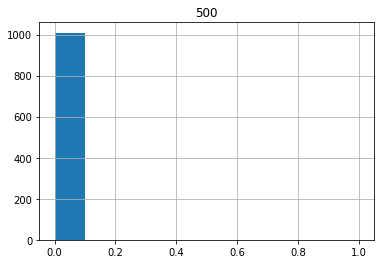

In [ ]:
fhund= [n for n in range(1,100)]
sciKitJaccTable.hist(500)

In [ ]:
merged = [sciKitJaccTable[]]

SyntaxError: ignored